In [1]:
### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)


In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), 
                  centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
                     
print(X.shape, y.shape)

(450, 2) (450,)


In [4]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), 
                  centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
                     
print(X.shape, y.shape)

(450, 2) (450,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)  

In [6]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), 
                  centers=2, 
                  cluster_std=[7.0, 2],
                  random_state=22)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(4500, 2) (4500,)


In [9]:
from sklearn.metrics import precision_recall_curve

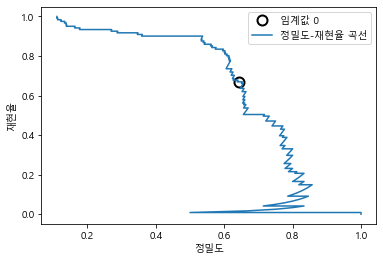

In [10]:
svc = SVC(gamma=.05).fit(X_train, y_train)

pred = svc.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(
                                             y_test, pred)

# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

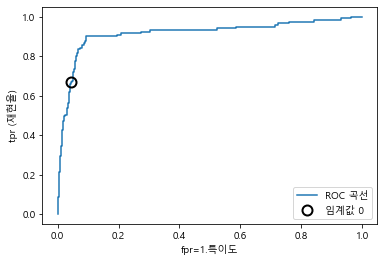

In [12]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC 곡선')
plt.xlabel('fpr=1.특이도')
plt.ylabel('tpr (재현율)')

close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='임계값 0', fillstyle='none', c='k',mew=2)
plt.legend(loc=4)

### 모델을 선택, 학습한 수 AUC 값 구하기

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# RandomForest
rf=RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# 서포트 벡터 머신(Support Vector Machine)
svc=SVC(gamma=.05).fit(X_train, y_train)
pred=svc.decision_function(X_test)

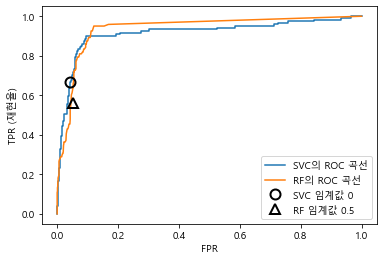

In [16]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [15]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916
